<a href="https://colab.research.google.com/github/yousrajamhour/yousrajamhour/blob/main/Jamhour_Yousra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn

In [2]:
data=pd.read_csv('AirQualityUCI.csv',sep=';')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314,-200,"13,5",1101,472,539,190,1374,1729,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163,-200,"11,4",1027,353,604,179,1264,1269,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142,-200,"12,4",1063,293,603,175,1241,1092,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003,-200,"9,5",961,235,702,156,1041,770,"28,3","13,5","0,5139"


In [3]:
data['C6H6(GT)']=data['C6H6(GT)'].str.replace(',','.')
data['CO(GT)']=data['CO(GT)'].str.replace(',','.')
data['T']=data['T'].str.replace(',','.')
data['RH']=data['RH'].str.replace(',','.')
data['AH']=data['AH'].str.replace(',','.')
data['C6H6(GT)']=data['C6H6(GT)'].astype(float)
data[['CO(GT)','T','RH','AH']] = data[['CO(GT)','T','RH','AH']].astype(float)

nous avons remplacé chaque virgule existant dans les valeurs de notre data par des points pour qu'on puisse rendre les valeurs en float 
ensuite nous avons rendu chaque valeur des colonnes en float

In [4]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [5]:
data.dropna(axis=0, how= 'all', inplace=True)
data.dropna(axis=1, inplace=True)

In [6]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


nous avons remplacé chaque valeur qui est égale à -200 par NaN

In [7]:
data.fillna(data.mean(), inplace= True)

nous avons affecter à la case qui contient NaN par la moyenne de la colonne où cette valeur se trouve.

In [8]:
data['Date']

0       10/03/2004
1       10/03/2004
2       10/03/2004
3       10/03/2004
4       10/03/2004
           ...    
9352    04/04/2005
9353    04/04/2005
9354    04/04/2005
9355    04/04/2005
9356    04/04/2005
Name: Date, Length: 9357, dtype: object

In [9]:
data['Time']

0       18.00.00
1       19.00.00
2       20.00.00
3       21.00.00
4       22.00.00
          ...   
9352    10.00.00
9353    11.00.00
9354    12.00.00
9355    13.00.00
9356    14.00.00
Name: Time, Length: 9357, dtype: object

In [10]:
from datetime import datetime
Date=[]
for i in data['Date']:
    Date.append(datetime.strptime(i,'%d/%m/%Y'))

In [11]:
data.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [12]:
Date=pd.Series(Date)
data['Date']=pd.to_numeric(Date)

In [13]:
data['Date']=data['Date'].astype(float)
data.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

le type de la colonne Date est devenu float

In [14]:
from datetime import datetime
Time=[]
for i in data['Time']:
    Time.append(datetime.strptime(i,'%H.%M.%S'))
data.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [15]:
Time=pd.Series(Time)
data['Time']=pd.to_numeric(Time)

In [16]:
data['Time']=data['Time'].astype(float)
data.dtypes

Date             float64
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

le type de la colonne Time est devenu float

In [17]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.078877e+18,-2.208924e+18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1.078877e+18,-2.208920e+18,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1.078877e+18,-2.208917e+18,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1.078877e+18,-2.208913e+18,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.078877e+18,-2.208910e+18,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


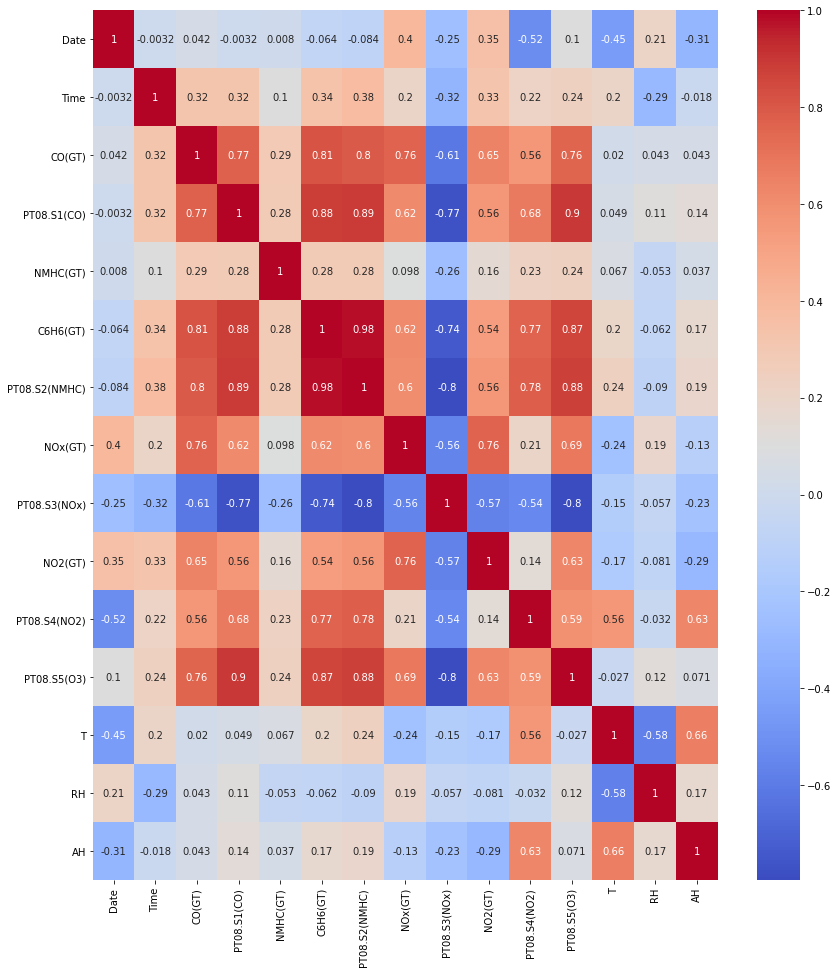

In [18]:
plt.figure(figsize=(14,16))
seaborn.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [19]:
data.drop(['Date', 'Time'], axis=1,inplace=True)

nous avons supprimé Date et Time parcequ'ils ont une faible corrélation avec notre target d'apres la vision de la matrice de corrélation au dessus.

In [20]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [21]:
data.drop('T',axis=1,inplace=True)
data.drop('RH',axis=1,inplace=True)
data.drop('AH',axis=1,inplace=True)
data.drop('NMHC(GT)',axis=1,inplace=True)
data.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0


nous avons supprimé ces colonnes parcequ'ils ont une faible corrélation avec notre target

**Linear Regression**

In [22]:
features=data.columns.drop("C6H6(GT)")
y=data['C6H6(GT)']
x=data[features]




*   target y contient la colonne C6H6
*   features x contient toutes les colonnes et ne contient pas la colonne qui represente target.



In [23]:
from sklearn.model_selection import train_test_split
x_training,x_test,y_training,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(x_training,y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_prediction=lr.predict(x_test)
print(y_prediction)

[ 5.8586366  -0.64145436  1.47202755 ...  2.0612878   8.84752496
  6.84254088]


In [26]:
lr.predict([[2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0]])

array([14.25935436])

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)

0.9765923503231557

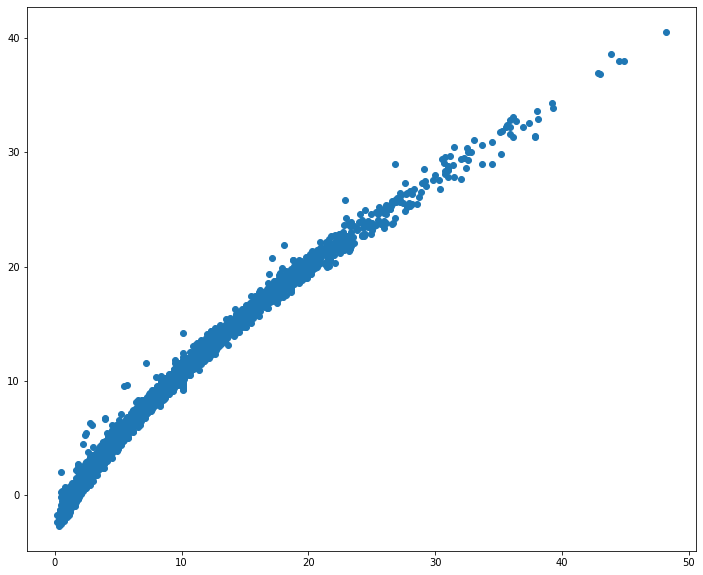

In [28]:
plt.figure(figsize=(12,10))
plt.scatter(y_test,y_prediction) 
plt.show()

In [29]:
prediction_y_data=pd.DataFrame({'actual_value':y_test,'predicted_value':y_prediction,'difference':y_test-y_prediction})
prediction_y_data[5:30]

,actual_value,predicted_value,difference
1651,17.0,17.419078,-0.419078
6040,14.6,15.212166,-0.612166
3480,13.7,13.094245,0.605755
390,5.2,6.284563,-1.084563
3380,7.1,7.540067,-0.440067
9002,14.8,15.642273,-0.842273
6030,5.0,5.206292,-0.206292
9198,5.0,4.474921,0.525079
5110,14.2,15.036475,-0.836475
4320,13.5,14.092861,-0.592861


In [30]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_prediction))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 1.0907187408338643


In [31]:
#evaluation du modele pour training set
from sklearn.metrics import r2_score
y_training_predict=lr.predict(x_training)
rmse=(np.sqrt(mean_squared_error(y_training,y_training_predict)))
r2=r2_score(y_training,y_training_predict)
print('la performance du modele sur la base')
print('---------------------------')
print('l erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

la performance du modele sur la base
---------------------------
l erreur quadratique moyenne est 1.1839572041232573
le score R2 est 0.9742295611117827




In [32]:
##evaluation du modele pour testing set
from sklearn.metrics import r2_score
y_testing_predict=lr.predict(x_test)
rmsel=(np.sqrt(mean_squared_error(y_test,y_testing_predict)))
r2=r2_score(y_test,y_testing_predict)
print('la performance du modele sur la base')
print('---------------------------')
print('l erreur quadratique moyenne est {}'.format(rmsel))
print('le score R2 est {}'.format(r2))
print('\n')

la performance du modele sur la base
---------------------------
l erreur quadratique moyenne est 1.0907187408338643
le score R2 est 0.9765923503231557




**Decision Tree Regressor**

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_training,y_training)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
y_prediction=dtr.predict(x_test)
print(y_prediction)

[5.2 1.6 2.4 ... 2.4 7.6 5.7]


In [35]:
dtr.predict([[2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0]])

array([11.9])

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)

0.9999046340629878

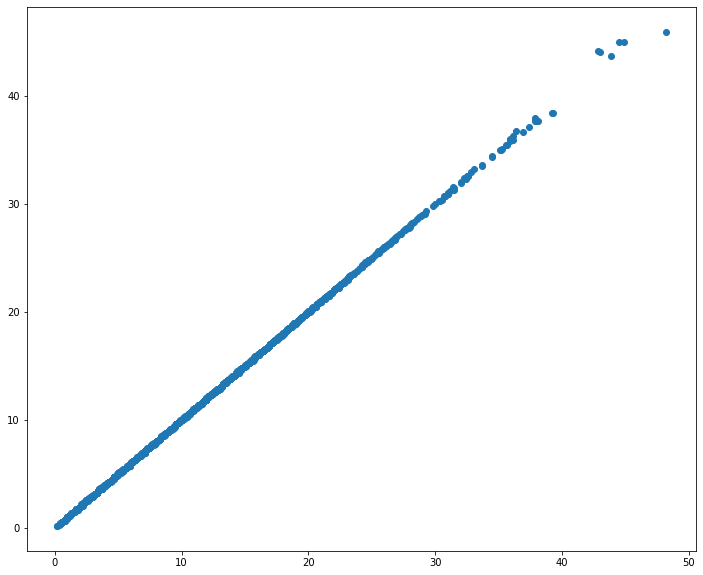

In [37]:
plt.figure(figsize=(12,10))
plt.plot(y_test,y_prediction,'o')
plt.show()

In [38]:
prediction_y_data=pd.DataFrame({'actual value':y_test,'predicted_value':y_prediction,'difference':y_test-y_prediction})
prediction_y_data[5:30]

,actual value,predicted_value,difference
1651,17.0,17.0,0.000000e+00
6040,14.6,14.6,-3.552714e-15
3480,13.7,13.7,5.329071e-15
390,5.2,5.3,-1.000000e-01
3380,7.1,7.1,3.552714e-15
9002,14.8,14.8,-3.552714e-15
6030,5.0,5.0,0.000000e+00
9198,5.0,5.1,-1.000000e-01
5110,14.2,14.2,5.329071e-15
4320,13.5,13.5,0.000000e+00


In [39]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_prediction))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 0.0696194376368131


In [40]:
#evaluation du modele pour training set
from sklearn.metrics import r2_score
y_training_predict=dtr.predict(x_training)
rmse=(np.sqrt(mean_squared_error(y_training,y_training_predict)))
r2=r2_score(y_training,y_training_predict)
print('la performance du modele sur la base')
print('---------------------------')
print('l erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

la performance du modele sur la base
---------------------------
l erreur quadratique moyenne est 1.2664068637972821e-14
le score R2 est 1.0




In [41]:
#evaluation du modele pour testing set
from sklearn.metrics import r2_score
y_testing_predict=dtr.predict(x_test)
rmset=(np.sqrt(mean_squared_error(y_test,y_testing_predict)))
r2=r2_score(y_test,y_testing_predict)
print('la performance du modele sur la base')
print('---------------------------')
print('l erreur quadratique moyenne est {}'.format(rmset))
print('le score R2 est {}'.format(r2))
print('\n')

la performance du modele sur la base
---------------------------
l erreur quadratique moyenne est 0.0696194376368131
le score R2 est 0.9999046340629878




**Random Forest Regressor**

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_training,y_training)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
y_prediction=rfg.predict(x_test)
print(y_prediction)


[5.2   1.6   2.401 ... 2.403 7.6   5.725]


In [44]:
rfg.predict([[2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0]])

array([11.9])

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)


0.9999489146187066

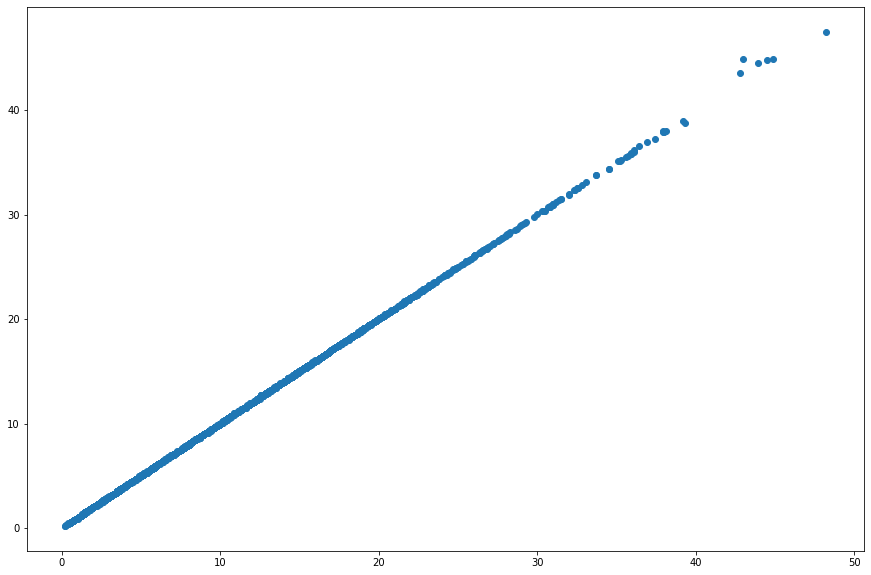

In [46]:
plt.figure(figsize=(15,10))
plt.plot(y_test,y_prediction,'o')
plt.show()
plt.show()

In [47]:
prediction_y_data=pd.DataFrame({'actual value':y_test,'predicted_value':y_prediction,'difference':y_test-y_prediction})
prediction_y_data[5:30]

,actual value,predicted_value,difference
1651,17.0,17.000,0.000000e+00
6040,14.6,14.600,1.598721e-14
3480,13.7,13.700,-2.486900e-14
390,5.2,5.251,-5.100000e-02
3380,7.1,7.100,-1.243450e-14
9002,14.8,14.797,3.000000e-03
6030,5.0,5.000,0.000000e+00
9198,5.0,5.086,-8.600000e-02
5110,14.2,14.200,-2.486900e-14
4320,13.5,13.496,4.000000e-03


In [48]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_prediction))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 0.05095445846642583


In [49]:
#evaluation du modele pour training set
from sklearn.metrics import r2_score
y_training_predict=rfg.predict(x_training)
rmse=(np.sqrt(mean_squared_error(y_training,y_training_predict)))
r2=r2_score(y_training,y_training_predict)
print('la performance du modele sur la base')
print('---------------------------')
print('l erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

la performance du modele sur la base
---------------------------
l erreur quadratique moyenne est 0.0756185137409531
le score R2 est 0.9998948749826702




In [50]:
#evaluation du modele pour testing set
from sklearn.metrics import r2_score
y_testing_predict=rfg.predict(x_test)
rmsef=(np.sqrt(mean_squared_error(y_test,y_testing_predict)))
r2=r2_score(y_test,y_testing_predict)
print('la performance du modele sur la base')
print('---------------------------')
print('l erreur quadratique moyenne est {}'.format(rmsef))
print('le score R2 est {}'.format(r2))
print('\n')

la performance du modele sur la base
---------------------------
l erreur quadratique moyenne est 0.05095445846642583
le score R2 est 0.9999489146187066




**SVR**

In [51]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_training,y_training)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
y_prediction=svr.predict(x_test)
print(y_prediction)

[5.09419266 1.56873998 2.49511814 ... 2.43546258 7.5558179  5.72044576]


In [53]:
svr.predict([[2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0]])

array([11.91014469])

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)


0.9969314323528946

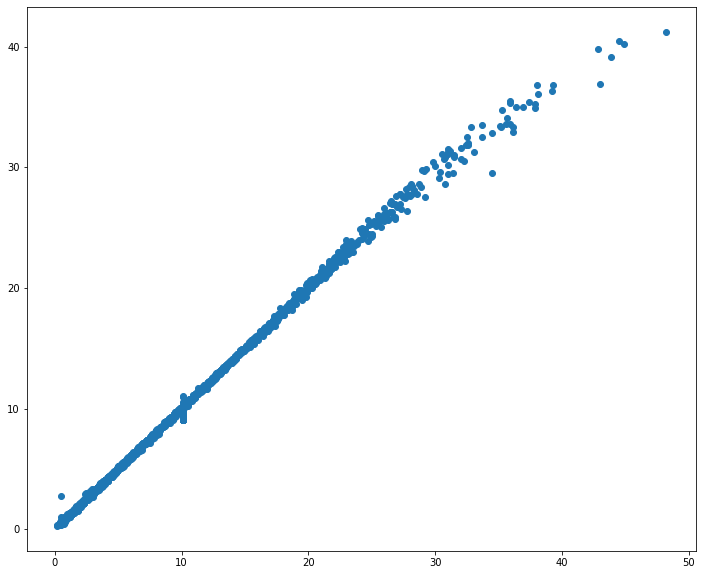

In [55]:
plt.figure(figsize=(12,10))
plt.plot(y_test,y_prediction,'o')
plt.show()

In [56]:
prediction_y_data=pd.DataFrame({'actual value':y_test,'predicted_value':y_prediction,'difference':y_test-y_prediction})
prediction_y_data[5:30]

,actual value,predicted_value,difference
1651,17.0,17.012710,-0.012710
6040,14.6,14.597002,0.002998
3480,13.7,13.647698,0.052302
390,5.2,5.255225,-0.055225
3380,7.1,7.030224,0.069776
9002,14.8,14.750865,0.049135
6030,5.0,5.065586,-0.065586
9198,5.0,4.995523,0.004477
5110,14.2,14.183703,0.016297
4320,13.5,13.579875,-0.079875


In [57]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_prediction))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 0.39491326487960576


In [58]:
#evaluation du modele pour training set
from sklearn.metrics import r2_score
y_training_predict=svr.predict(x_training)
rmse=(np.sqrt(mean_squared_error(y_training,y_training_predict)))
r2=r2_score(y_training,y_training_predict)
print('la performance du modele sur la base')
print('---------------------------')
print('l erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

la performance du modele sur la base
---------------------------
l erreur quadratique moyenne est 0.6106044467960549
le score R2 est 0.993145595474074




In [59]:
#evaluation du modele pour testing set
from sklearn.metrics import r2_score
y_testing_predict=svr.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_testing_predict)))
r2=r2_score(y_test,y_testing_predict)
print('la performance du modele sur la base')
print('---------------------------')
print('l erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

la performance du modele sur la base
---------------------------
l erreur quadratique moyenne est 0.39491326487960576
le score R2 est 0.9969314323528946




on constate que **le meilleur modèle est le modèle Random Forest Regressor** parce qu'en testing il a la plus petite erreur quadratique moyenne en la comparant aux autres erreurs des autres modèles et il a un score R2 qui est élevé .
